In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

from querys import get_reservas_int, get_plazo_fijo, get_usd, get_base_monetaria, get_circulacion_monetaria, get_tasa_depositos_30

In [3]:
df = get_reservas_int()
#chequear valor dolar_blue
#2003 Nestor(reservas internacionales
#               intervencion precio del dolar
# 
#               proteccion despido arbitrario
#               fortalecimiento de produccion local
#               demanda y consumo de demanda local
#                   suba valor del peso
#
#               REGULAR OFERTA MONETARIA DEL DOLAR
# )

In [4]:
df

,fecha,reservas_internacionales
0,1996-01-02,17314
1,1996-01-03,17404
2,1996-01-04,17435
3,1996-01-05,17609
4,1996-01-08,17674
...,...,...
6555,2022-07-27,39354
6556,2022-07-28,39217
6557,2022-07-29,38232
6558,2022-08-01,38039


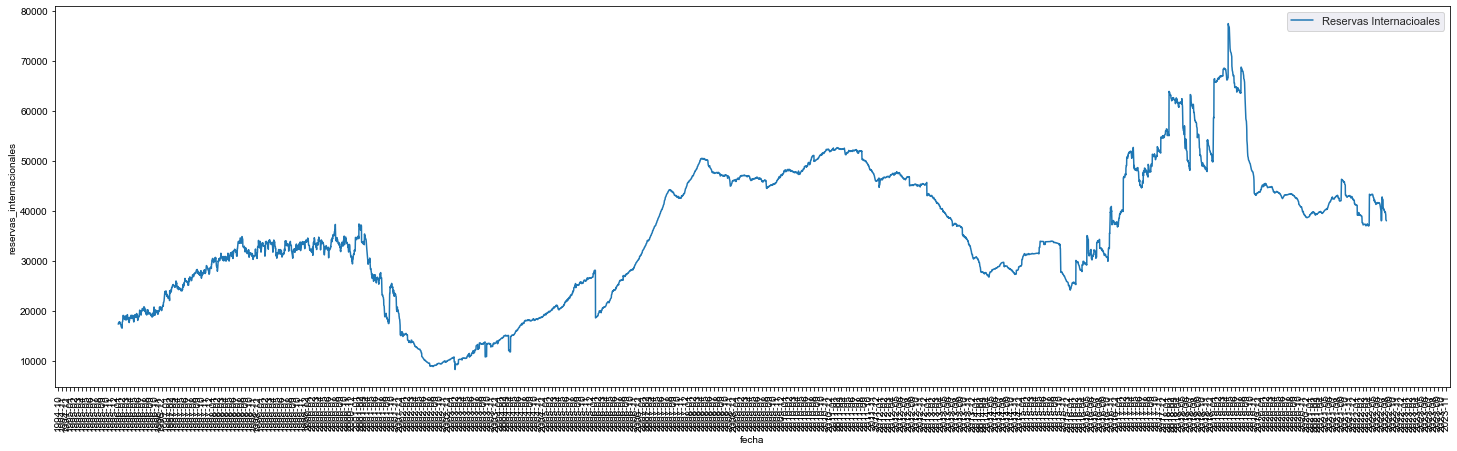

In [5]:
fig, axes = plt.subplots(figsize=(25,7))

sns.set(rc={'figure.figsize':(30,10)})
sns.lineplot(x='fecha',y='reservas_internacionales',data=df, label='Reservas Internacioales')
#sns.lineplot(x='fecha',y='dolar_oficial',data=df, label= 'Dolar Oficial')

# for i in events:
#     plt.axvline(i, color='black', linestyle='--', linewidth=2, label = f'{i}: {events[i]}')

months = mdates.MonthLocator() 
years_fmt = mdates.DateFormatter('%Y-%m') 
axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(months)  

plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

#

In [6]:
plazo_fijo = get_plazo_fijo()
plazo_fijo

,fecha,plazo_fijo
0,1996-01-02,26134
1,1996-01-03,26014
2,1996-01-04,26251
3,1996-01-05,26432
4,1996-01-08,26472
...,...,...
6554,2022-07-27,7778089
6555,2022-07-28,7737083
6556,2022-07-29,7737004
6557,2022-08-01,7650765


In [7]:
usd = get_usd()

In [8]:
corr = pd.merge(plazo_fijo, usd, on='fecha')

In [9]:
corr

,fecha,plazo_fijo,dolar_blue
0,2000-05-24,54742,1.0005
1,2000-05-26,54696,1.0004
2,2000-05-29,54437,1.0007
3,2000-05-30,54719,1.0009
4,2000-05-31,54908,1.0010
...,...,...,...
5432,2022-07-27,7778089,326.0000
5433,2022-07-28,7737083,314.0000
5434,2022-07-29,7737004,296.0000
5435,2022-08-01,7650765,282.0000


<AxesSubplot:xlabel='fecha'>

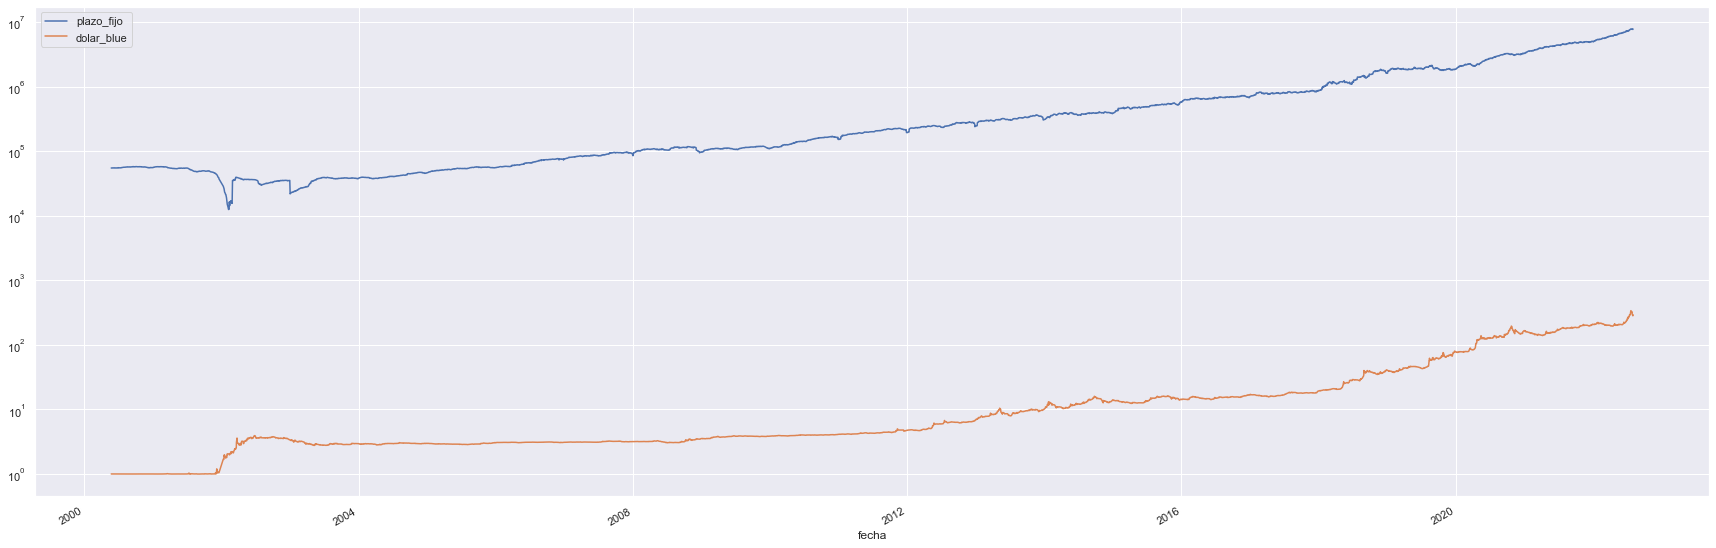

In [10]:
corr.plot(x='fecha', logy=True)
# Plazos fijos altos para controlar precio del dolar
# Reescalado


In [11]:
base_monetaria = get_base_monetaria()

<AxesSubplot:xlabel='fecha'>

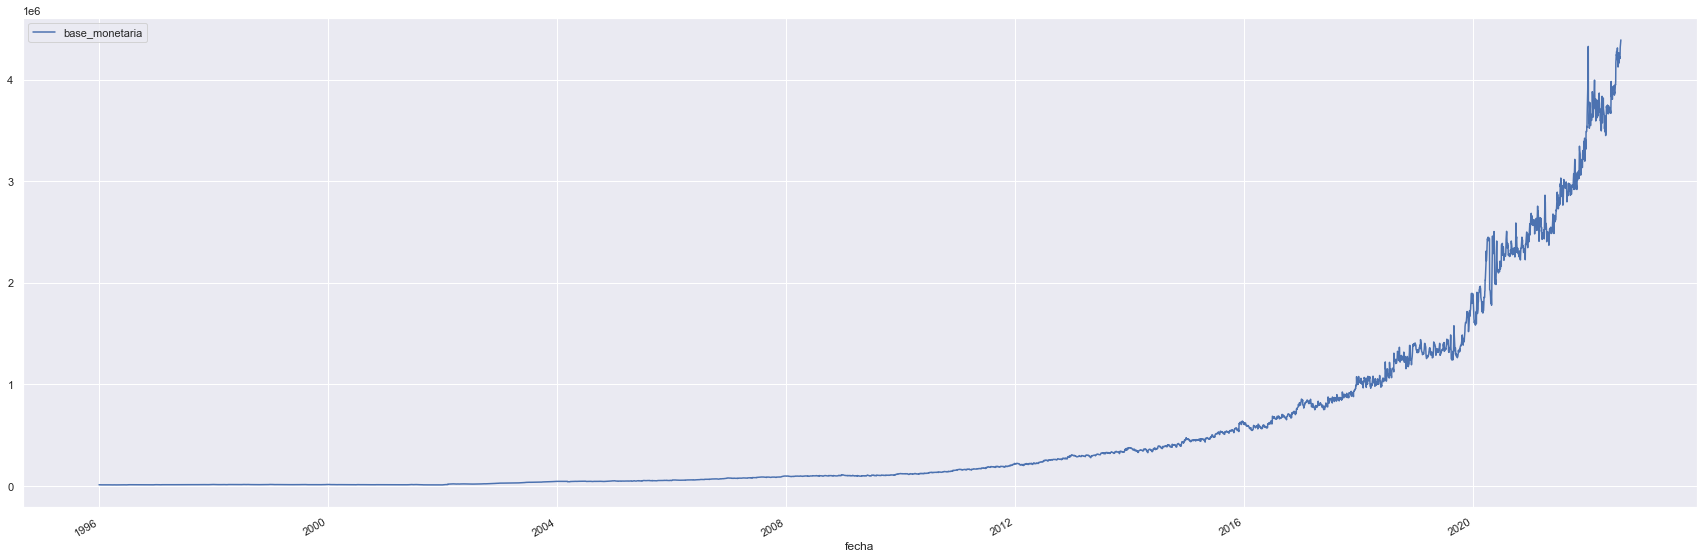

In [12]:
base_monetaria.plot(x='fecha')

In [13]:
corr = pd.merge(corr, base_monetaria, on='fecha')

In [14]:
corr['dolar_blue_re'] = corr['dolar_blue']*10000*2

<AxesSubplot:xlabel='fecha'>

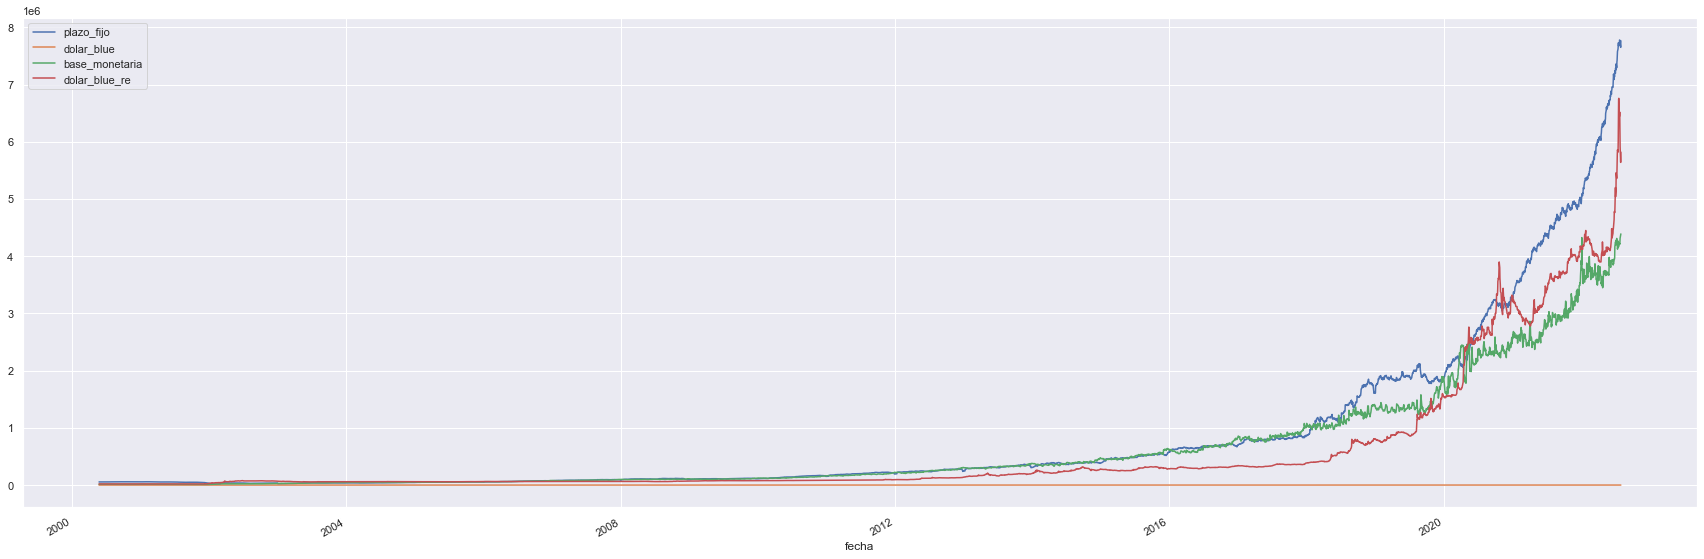

In [15]:
corr.plot(x='fecha')

In [16]:
circulacion = get_circulacion_monetaria()

In [17]:
corr = pd.merge(corr, circulacion, on='fecha', how='right')

In [18]:
tasa = get_tasa_depositos_30()

In [19]:
corr = pd.merge(corr, tasa, on='fecha', how='right')

In [21]:
corr = corr[corr.fecha > '2010-01-01']

In [33]:
corr['tasa_interes'] = corr['tasa_depositos_30']*10000*4

In [35]:
corr.corr()

,plazo_fijo,dolar_blue,base_monetaria,dolar_blue_re,circulacion_monetaria,tasa_depositos_30,tasa_interes
plazo_fijo,1.000000,0.976211,0.982570,0.976211,0.987918,0.712426,0.712426
dolar_blue,0.976211,1.000000,0.971363,1.000000,0.978816,0.636365,0.636365
base_monetaria,0.982570,0.971363,1.000000,0.971363,0.995046,0.728597,0.728597
dolar_blue_re,0.976211,1.000000,0.971363,1.000000,0.978816,0.636365,0.636365
circulacion_monetaria,0.987918,0.978816,0.995046,0.978816,1.000000,0.698208,0.698208
tasa_depositos_30,0.712426,0.636365,0.728597,0.636365,0.698208,1.000000,1.000000
tasa_interes,0.712426,0.636365,0.728597,0.636365,0.698208,1.000000,1.000000


<AxesSubplot:xlabel='fecha'>

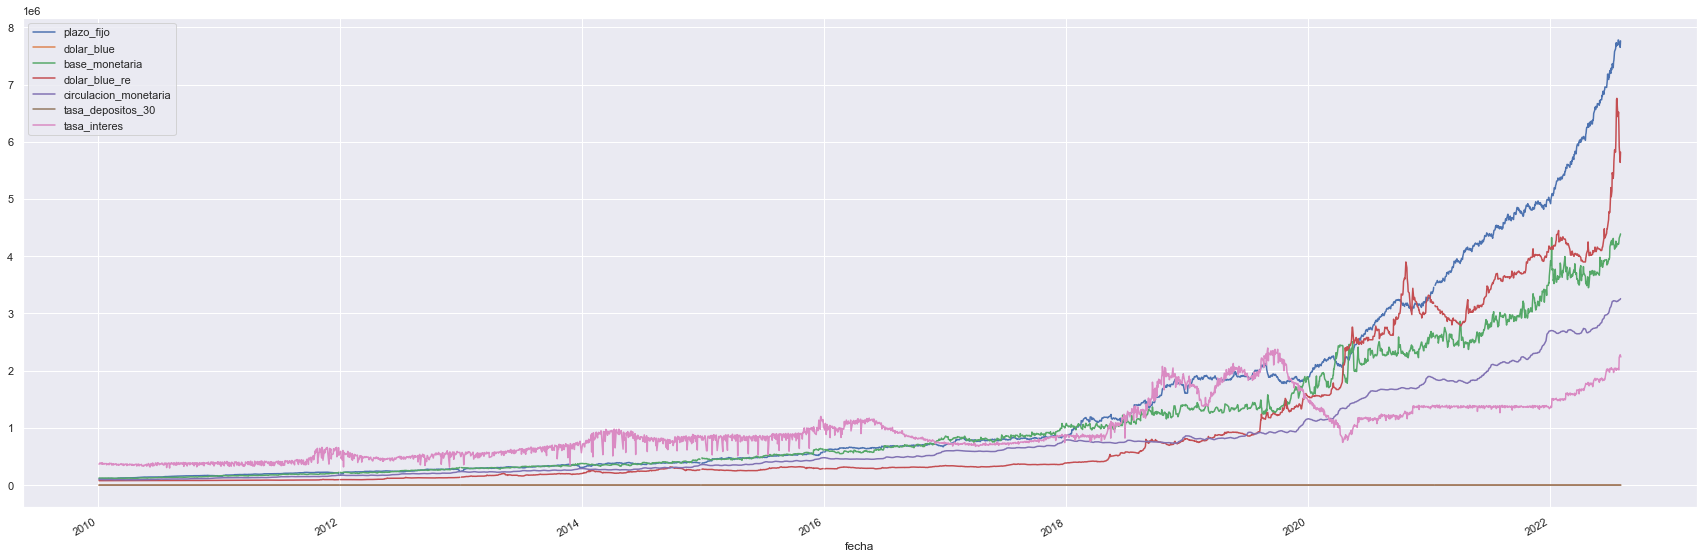

In [34]:
corr.plot(x='fecha')
